In [1]:
# importación de las librerias y bibliotecas que serán utilizadas para el análisis y preparación de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [2]:
#Lectura del dataset 
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Visualización inicial del conjunto de datos
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Evaluación de los datos

In [4]:
#Visualizamos la informacion básica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Visualización de la información estadística del conjunto de datos
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

In [7]:
#Validación si hay algún valor nulo en el conjunto de datos.
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [8]:
#Validación de la cantidad de ejemplos que posee el dataset segun la variable de salida.
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
#Transformación de las columnas categoricas a numericas.
df_new = pd.get_dummies(df, columns=['gender','smoking_status'], drop_first=True)

In [10]:
#Eliminación de datos que son irrelevantes y que podrian afectar el resultado.
df_new = df_new.drop(['id','ever_married','work_type','Residence_type'], axis=1)

In [11]:
#Vizualición de los cambios aplicados
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,0


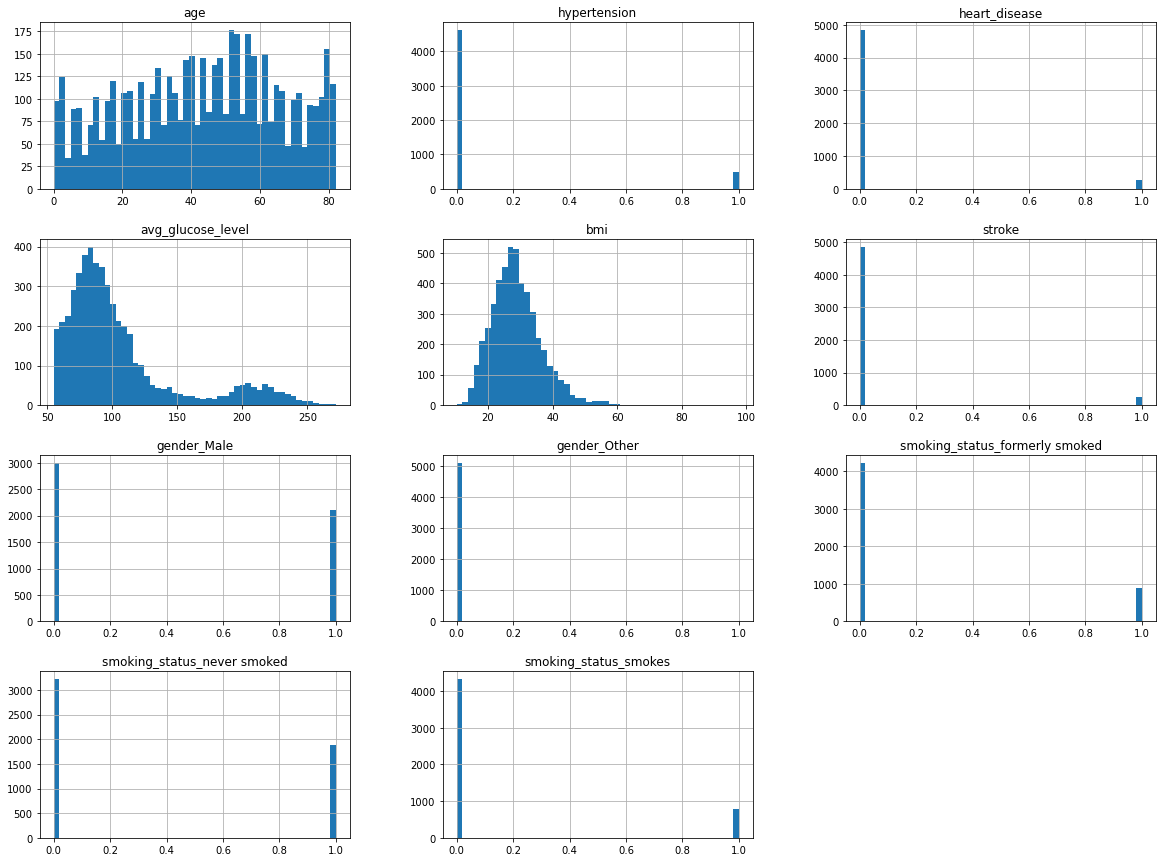

In [12]:
# Representación gráfica de la distribución de los atributos
df_new.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
edad_grupo = pd.cut(x=df_new['age'],
                    bins=[0,10,20,30,40,50,60,70,80,85,float('inf')], 
                    labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-85","85+"])
edad_total = edad_grupo.value_counts().sort_index()

edad_indexes = edad_total.index.values
edad_valores = edad_total.values

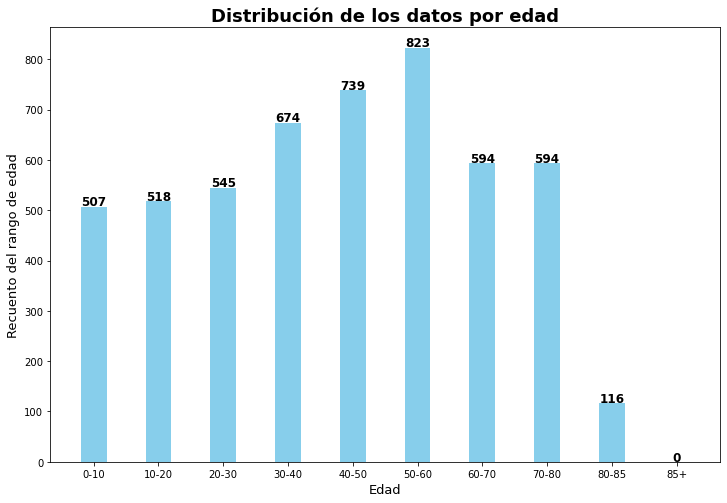

In [14]:
plt.figure(figsize = (12, 8))
 
# Creación de una gráfica bar plot para representar la distribución de la edad
edad_bar = plt.bar(edad_indexes, edad_valores, color ='Skyblue', width = 0.4)
for i, rectangle in enumerate(edad_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             edad_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Recuento del rango de edad", fontsize=13)
plt.title("Distribución de los datos por edad", weight='bold', fontsize=18)
plt.show()

In [15]:
glucose_grupo = pd.cut(x=df_new['avg_glucose_level'],
                    bins=[50,100,150,200,250,275,float('inf')], 
                    labels=["50-100","100-150","150-200","200-250","250-275","275+"])
glucose_total = glucose_grupo.value_counts().sort_index()

glucose_indexes = glucose_total.index.values
glucose_valores = glucose_total.values

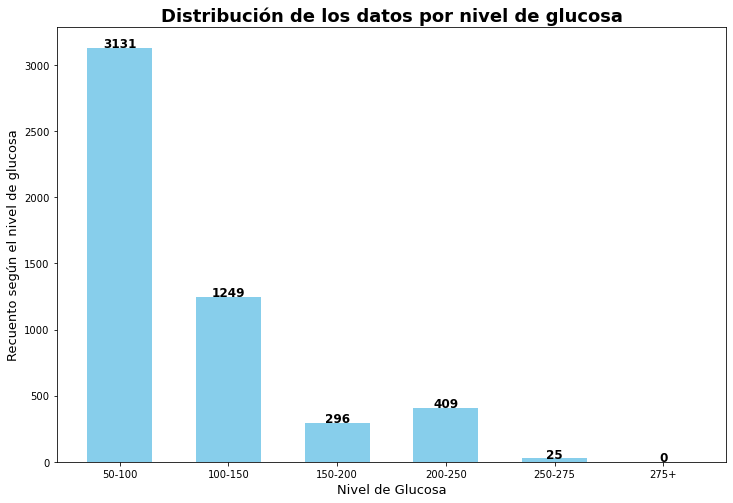

In [16]:
plt.figure(figsize = (12,8))
 
# Creación de una gráfica bar plot para representar la distribución de los datos segun el nivel de glucosa
glucose_bar = plt.bar(glucose_indexes, glucose_valores, color ='Skyblue', width = 0.6)
for i, rectangle in enumerate(glucose_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             glucose_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Nivel de Glucosa", fontsize=13)
plt.ylabel("Recuento según el nivel de glucosa", fontsize=13)
plt.title("Distribución de los datos por nivel de glucosa", weight='bold', fontsize=18)
plt.show()

In [17]:
bmi_grupo = pd.cut(x=df_new['bmi'],
                    bins=[10,20,30,40,50,60,70,80,90,97,float('inf')], 
                    labels=["10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-97","97+"])
bmi_total = bmi_grupo.value_counts().sort_index()

bmi_indexes = bmi_total.index.values
bmi_valores = bmi_total.values

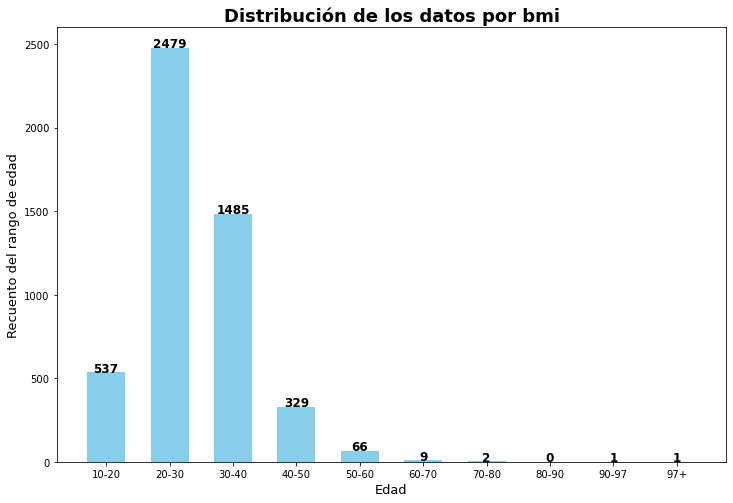

In [18]:
plt.figure(figsize = (12,8))
 
# Creación de una gráfica bar plot para representar la distribución de los datos segun el valor de bmi
bmi_bar = plt.bar(bmi_indexes, bmi_valores, color ='Skyblue', width = 0.6)
for i, rectangle in enumerate(bmi_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             bmi_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Recuento del rango de edad", fontsize=13)
plt.title("Distribución de los datos por bmi", weight='bold', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular')

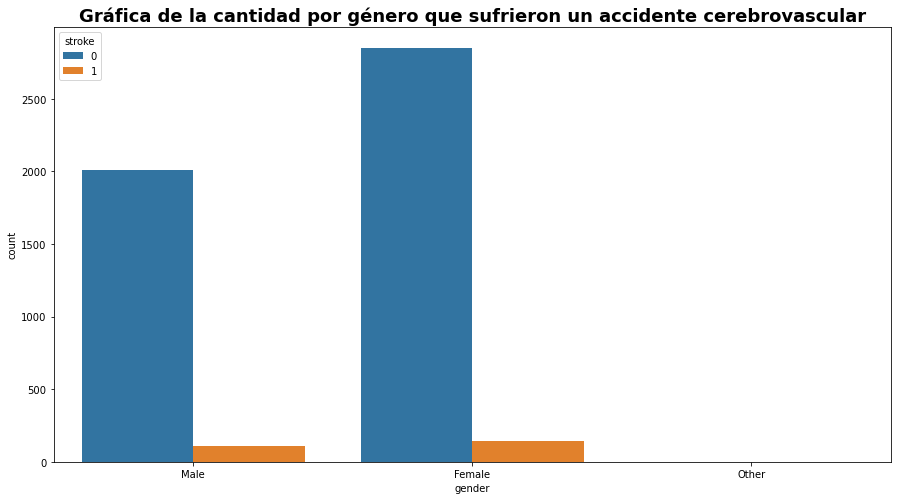

In [19]:
# Creación de una gráfica por género de las personas que sufrieron o no un ACV
plt.figure(figsize=[15,8])
sns.countplot(x = 'gender', hue = 'stroke', data = df)
plt.title('Gráfica de la cantidad por género que sufrieron un accidente cerebrovascular', weight='bold', fontsize=18)

Text(0.5, 1.0, 'Gráfica de la cantidad  de personas que sufrieron un ACV y que poseen o no enfermedades del corazón')

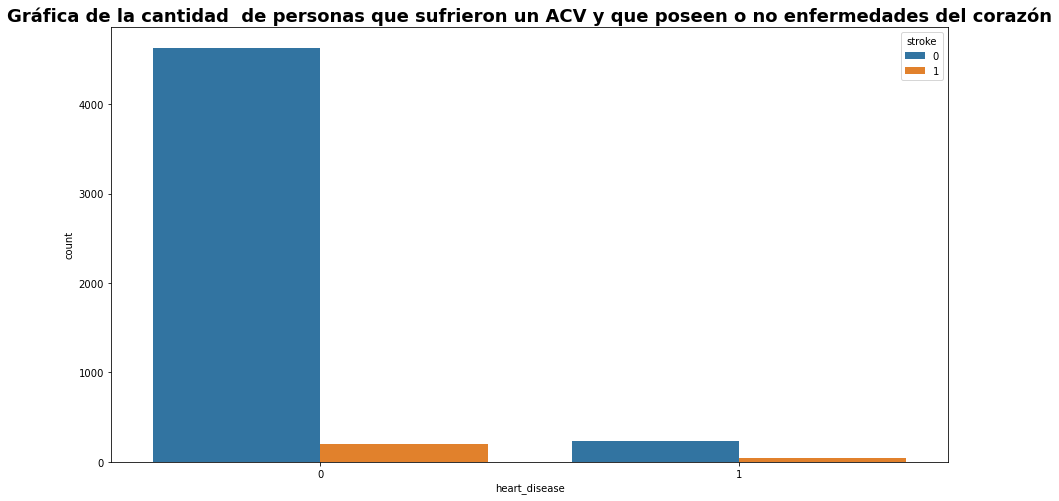

In [20]:
# Creación de una gráfica de las personas que posee enfermedades del corazón y sufrieron o no un ACV
plt.figure(figsize=[15,8])
sns.countplot(x = 'heart_disease', hue = 'stroke', data = df)
plt.title('Gráfica de la cantidad  de personas que sufrieron un ACV y que poseen o no enfermedades del corazón', weight='bold', fontsize=18)

Text(0.5, 1.0, 'Gráfica de la cantidad  de personas que sufrieron un ACV y que padecen o no de hipertención')

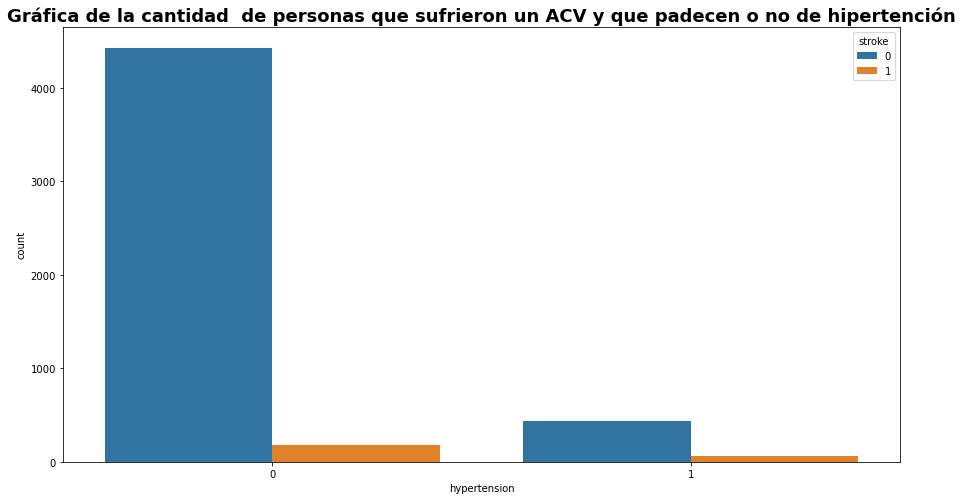

In [21]:
# Creación de una gráfica de la cantidad  de personas que sufrieron un ACV y que padecen o no de hipertención
plt.figure(figsize=[15,8])
sns.countplot(x = 'hypertension', hue = 'stroke', data = df)
plt.title('Gráfica de la cantidad  de personas que sufrieron un ACV y que padecen o no de hipertención', weight='bold', fontsize=18)

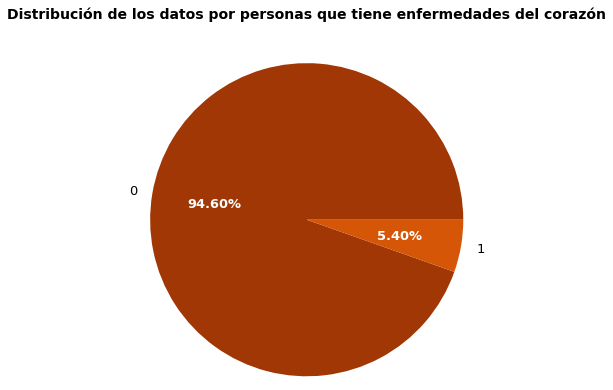

In [22]:
#Creación de una gráfica para representar el porcentaje de las personas que padecen de enfermades del corazón
Gender = df['heart_disease'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por personas que tiene enfermedades del corazón', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

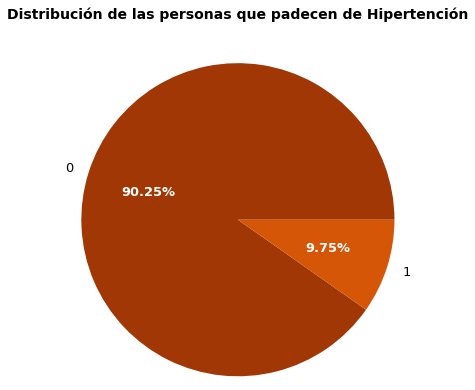

In [23]:
#Creación de una gráfica para representar el porcentaje de las personas que padecen de Hipertención
Gender = df['hypertension'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de las personas que padecen de Hipertención', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

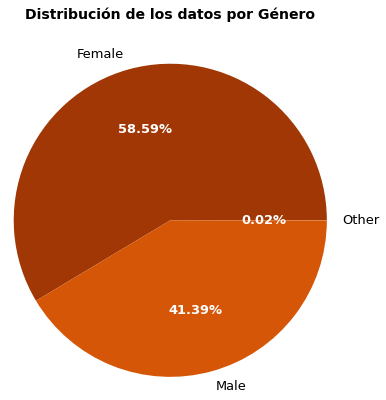

In [24]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['gender'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por Género', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

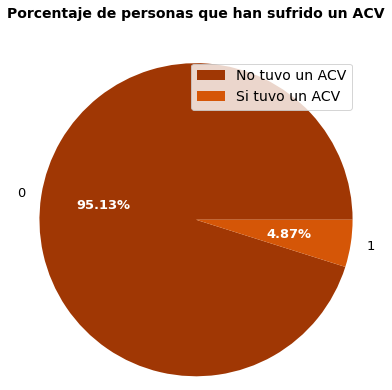

In [25]:
#Creación de una gráfica para representar el porcentaje de las peronas que sufrieron o no un ACV
Gender = df['stroke'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje de personas que han sufrido un ACV', y=1.1, weight='bold', fontsize=14)
ax.legend(labels=['No tuvo un ACV', 'Si tuvo un ACV'], fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

## Relleno de valores nulos y escalado de los datos

In [26]:
# Conjunto de datos general
X_df = df_new.drop("stroke", axis=1)
y_df = df_new["stroke"].copy()

In [27]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [28]:
# Rellenamos los valores nulos con la mediana y scalamos los datos
X_prep = num_pipeline.fit_transform(X_df)

In [29]:
# Transformamos el resultado a un DataFrame de Pandas
X_prep = pd.DataFrame(X_prep, columns=X_df.columns, index=y_df.index)

In [30]:
X_prep

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.611111,0.0,1.0,3.712987,0.944444,1.0,0.0,1.0,0.0,0.0
1,0.444444,0.0,0.0,2.994300,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.972222,0.0,1.0,0.380920,0.488889,1.0,0.0,0.0,1.0,0.0
3,0.111111,0.0,0.0,2.153481,0.700000,0.0,0.0,0.0,0.0,1.0
4,0.944444,1.0,0.0,2.231917,-0.455556,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.972222,1.0,0.0,-0.220790,0.000000,0.0,0.0,0.0,1.0,0.0
5106,1.000000,0.0,0.0,0.904193,1.322222,0.0,0.0,0.0,1.0,0.0
5107,-0.277778,0.0,0.0,-0.241417,0.277778,0.0,0.0,0.0,1.0,0.0
5108,0.166667,0.0,0.0,2.019406,-0.277778,1.0,0.0,1.0,0.0,0.0


## Balanceo del dataset

Según el análisis realizado, el conjunto de datos posee un desbalance con 4861 personas que no tuvieron un ACV y 249 personas que si tuvieron un ACV, al entrenar los diferentes algoritmos generaria una matriz de confusión desbalanceda,  por lo que se hara uso de la tecnica de sobremuestreo para equilibrar la cantidad de datos.

## Sobremuestreo 

In [31]:
no = y_df.sum()
si = y_df.shape[0]- no
print('Personas que no tuvieron un ACV:',si,'Personas que si tuvieron un ACV:', no)

Personas que no tuvieron un ACV: 4861 Personas que si tuvieron un ACV: 249


In [32]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0

In [33]:
#ROS. Duplica muestras de la clase menos representadas
X_Ros, y_Ros = ros.fit_resample(X_prep, y_df)
no_Ros = y_Ros.sum()
si_Ros = y_Ros.shape[0]- no_Ros
print('Personas que no tuvieron un ACV:',no_Ros ,'Personas que si tuvieron un ACV:', si_Ros)
X_Ros

Personas que no tuvieron un ACV: 4861 Personas que si tuvieron un ACV: 4861


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.611111,0.0,1.0,3.712987,0.944444,1.0,0.0,1.0,0.0,0.0
1,0.444444,0.0,0.0,2.994300,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.972222,0.0,1.0,0.380920,0.488889,1.0,0.0,0.0,1.0,0.0
3,0.111111,0.0,0.0,2.153481,0.700000,0.0,0.0,0.0,0.0,1.0
4,0.944444,1.0,0.0,2.231917,-0.455556,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9717,0.694444,0.0,0.0,3.520016,2.155556,0.0,0.0,0.0,1.0,0.0
9718,0.916667,0.0,0.0,-0.667526,-0.388889,0.0,0.0,0.0,1.0,0.0
9719,0.805556,0.0,0.0,3.792238,0.722222,0.0,0.0,1.0,0.0,0.0
9720,0.916667,1.0,0.0,1.164744,0.611111,1.0,0.0,0.0,0.0,0.0


## Entrenar y evaluar utilizando bosques aleatorios

In [34]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_Ros, y_Ros, test_size = 0.25, random_state=0)

In [35]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
#Prediccion con el conjunto de pruebas
y_pred = ranforest.predict(X_val)

In [37]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.988


In [38]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1187,   29],
       [   0, 1215]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


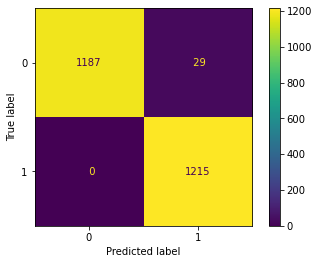

In [39]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ranforest, X_val, y_val, values_format='3g')

In [40]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1187   29]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1216
           1       0.98      1.00      0.99      1215

    accuracy                           0.99      2431
   macro avg       0.99      0.99      0.99      2431
weighted avg       0.99      0.99      0.99      2431



## Entrenar y evaluar utilizando K-Nearest Neighbors

In [41]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_Ros, y_Ros, test_size = 0.25, random_state=0)

In [42]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [44]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.976


In [45]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1157,   59],
       [   0, 1215]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


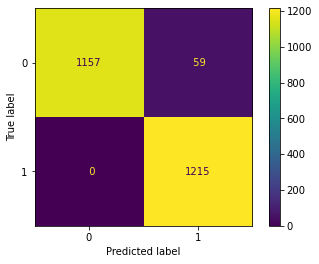

In [46]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [47]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1157   59]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1216
           1       0.95      1.00      0.98      1215

    accuracy                           0.98      2431
   macro avg       0.98      0.98      0.98      2431
weighted avg       0.98      0.98      0.98      2431



## Entrenar y evaluar utilizando árboles de decisión

In [48]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_Ros, y_Ros, test_size = 0.25, random_state=0)

In [49]:
# Ajustar el clasificador de Árbol de Decisión en el Conjunto de Entrenamiento
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [51]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.973


In [52]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1150,   66],
       [   0, 1215]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


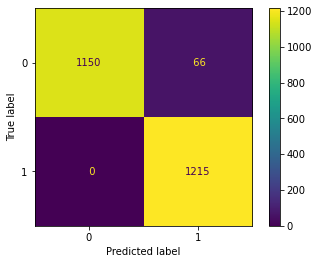

In [53]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [54]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1150   66]
 [   0 1215]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1216
           1       0.95      1.00      0.97      1215

    accuracy                           0.97      2431
   macro avg       0.97      0.97      0.97      2431
weighted avg       0.97      0.97      0.97      2431

